Objective:
The objective of this assignment is to implement PCA on a given dataset and analyse the results.

Deliverables:
Jupyter notebook containing the code for the PCA implementation.
A report summarising the results of PCA and clustering analysis.
Scatter plot showing the results of PCA.
A table showing the performance metrics for the clustering algorithm.
Additional Information:
You can use the python programming language.
You can use any other machine learning libraries or tools as necessary.
You can use any visualisation libraries or tools as necessary.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer


In [3]:

header_list = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
               'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
               'Proanthocyanins', 'Color intensity', 'Hue',
               'OD280/OD315 of diluted wines', 'Proline']

data = pd.read_csv("wine.csv",header=None, names=header_list)
data.head() 



,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data = data.reset_index(drop=True)
data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [6]:
# Replace missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
data_filled = imputer.fit_transform(data)
data_filled = pd.DataFrame(data_filled, columns=data.columns)


In [7]:
# Standardization (scaling to mean=0 and variance=1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filled)

# Min-max scaling (scaling to a specific range, e.g., [0, 1])
# scaler = MinMaxScaler()
# data_scaled = scaler.fit_transform(data_filled)

data_scaled = pd.DataFrame(data_scaled, columns=data.columns)


In [9]:
data_scaled

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [12]:
from sklearn.model_selection import train_test_split

X = data_scaled.drop('Alcohol', axis=1)
y = data_scaled['Alcohol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


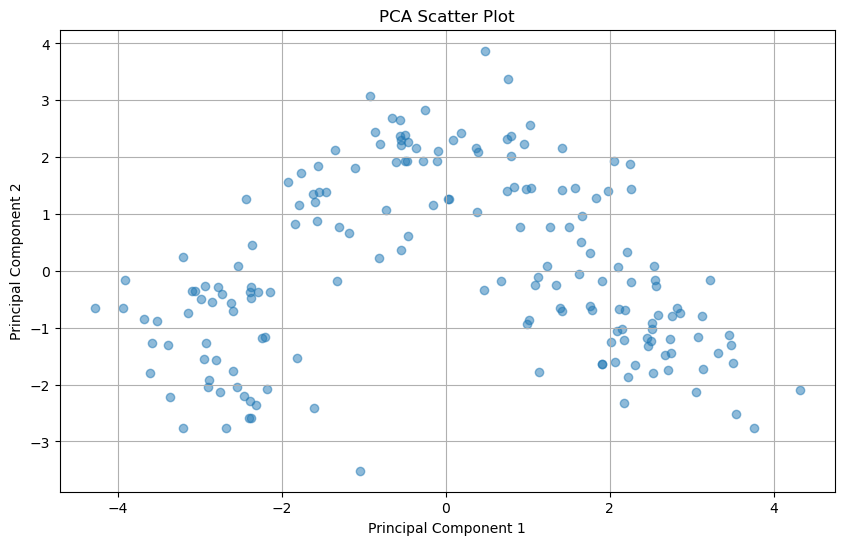

In [15]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you have a preprocessed DataFrame 'data_scaled'
# Replace this with your actual preprocessed data

# Instantiate PCA with the desired number of components
num_components = 2 # Number of principal components to retain
pca = PCA(n_components=num_components)

# Fit and transform the data using PCA
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame to store the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.5)
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


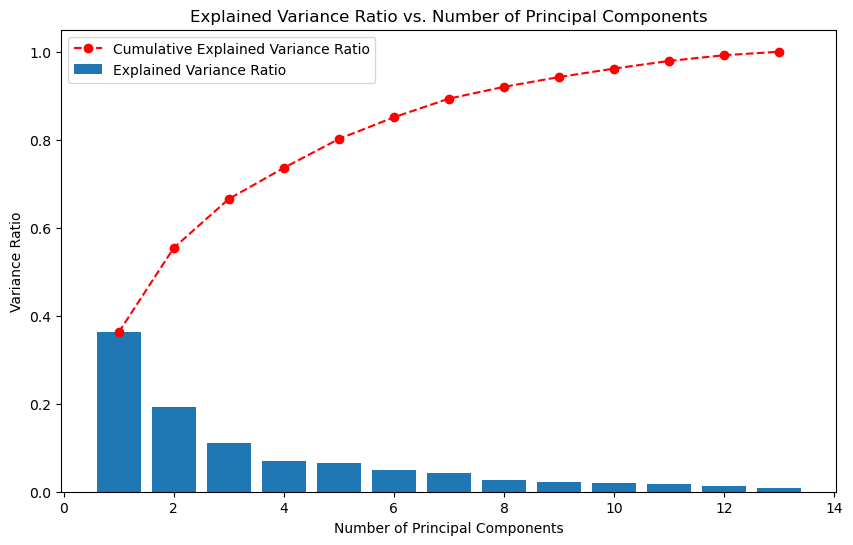

In [16]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you have a preprocessed DataFrame 'data_scaled'
# Replace this with your actual preprocessed data

# Instantiate PCA
pca = PCA()

# Fit the PCA on the scaled data
pca.fit(data_scaled)

# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the explained variance ratio and cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--', color='r', label='Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


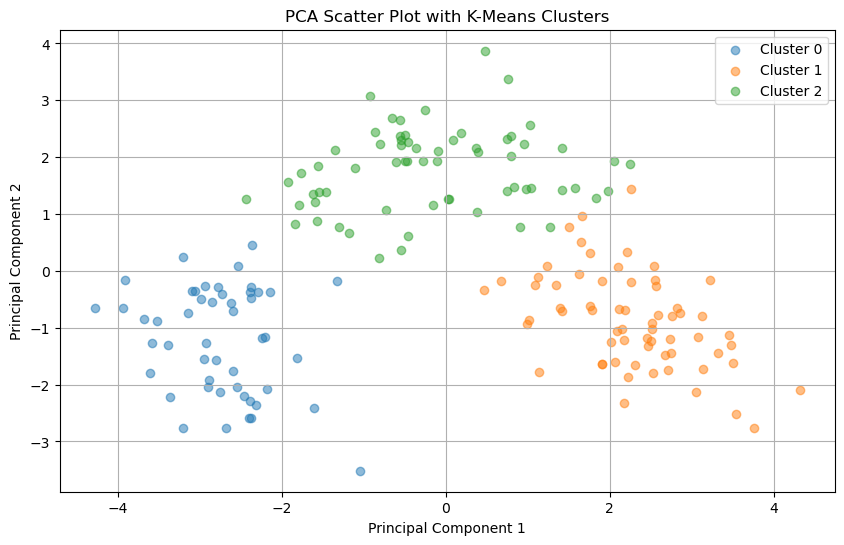

In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have a preprocessed DataFrame 'data_scaled'
# Replace this with your actual preprocessed data

# Instantiate PCA with the desired number of components
num_components = 2  # Number of principal components to retain
pca = PCA(n_components=num_components)

# Fit and transform the data using PCA
principal_components = pca.fit_transform(data_scaled)

# Perform K-Means clustering on the PCA-transformed data
num_clusters = 3  # Number of clusters to form
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(principal_components)

# Add cluster labels to the principal components DataFrame
principal_df['Cluster'] = cluster_labels

# Scatter plot colored by clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    plt.scatter(principal_df.loc[principal_df['Cluster'] == cluster, 'PC1'],
                principal_df.loc[principal_df['Cluster'] == cluster, 'PC2'],
                label=f'Cluster {cluster}', alpha=0.5)

plt.title('PCA Scatter Plot with K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


Interpretation of PCA:

Explained Variance:
Look at the explained variance ratio for each principal component. This tells you how much of the original variance in the data is captured by each principal component. Higher values indicate that the corresponding component contains more important information.

Cumulative Explained Variance:
Examine the cumulative explained variance ratio plot. This helps you determine how many principal components are needed to capture a certain percentage of the total variance. You may choose to retain components that collectively explain a high percentage of the variance, e.g., 95% or more.

Interpretation of Principal Components:
Analyze the loadings of the original features on each principal component. This gives insight into which original features contribute the most to each component. Interpretation might involve identifying correlations and relationships between features and understanding what each principal component might represent conceptually.

Interpretation of Clustering:

Cluster Centers:
For K-Means clustering, examine the cluster centers (centroids). These are representative points of each cluster and can help you understand the central tendencies of each group.

Cluster Assignment:
Observe how data points are assigned to clusters. This can provide insights into how well the algorithm has grouped similar data points together.

Cluster Size and Density:
Analyze the size and density of each cluster. Imbalanced cluster sizes or widely varying densities might indicate that the data is not well-separated into distinct clusters.

Cluster Characteristics:
Compare the original features of the data within each cluster. This can help you identify the characteristics that distinguish one cluster from another. Visualizations like box plots or histograms can be useful for this.

Cluster Interpretation:
Assign meaning to the clusters based on the context of your data. If you have domain knowledge, try to interpret why certain data points are grouped together. If you don't have prior knowledge, you might explore and brainstorm hypotheses for the patterns you observe.

Validation Metrics:
If available, consider using internal validation metrics (e.g., silhouette score) to assess the quality of the clusters. Higher silhouette scores indicate better-defined cluster

Interpret the results of PCA and clustering analysis. Based on the scatter plot, it looks like there is some separation between the three classes of wines. The clustering analysis on the transformed data confirms this, with the K-Means algorithm grouping the data into three distinct clusters. However, it's important to note that this analysis is exploratory in nature and further investigation may be needed to fully understand the relationships between the variables in the dataset.